In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('ushape.csv',names=["X","Y","class"])

In [11]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


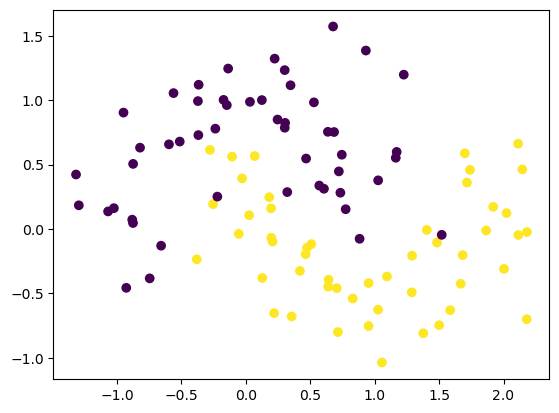

In [12]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [13]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [14]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [19]:
model1 = Sequential()

model1.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model1.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                30        
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Sets weights to 0
model1.get_weights()

[array([[-1.6820604e+00, -4.7317916e-01,  2.1951422e-03,  1.6376301e+00,
          9.4876099e-01, -6.0006268e-02, -1.1503212e+00,  1.1161478e+00,
          1.9073199e+00, -1.8236594e+00],
        [-4.3980235e-01, -1.8372049e-03, -5.6648409e-01,  1.0519502e+00,
          1.4607350e+00,  8.5627383e-01,  7.8172308e-01,  1.2898052e+00,
          8.6516929e-01,  2.6113757e-01]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.21667793,  0.6207649 ,  0.3270244 ,  0.5343257 , -0.21469924,
          0.20337456,  0.8993687 ,  0.1117685 ,  0.72683316, -0.06220336],
        [ 0.04393662, -0.4253617 ,  0.20988122, -0.06903753,  0.25490138,
         -0.35126787, -0.4375427 ,  0.4893271 ,  0.12699853, -0.53205615],
        [ 0.1208862 ,  0.01144555, -0.34454566,  0.1896785 ,  0.11411154,
          0.28637156, -0.318811  ,  0.6366956 ,  0.09172513, -0.3570429 ],
        [-0.54720545,  0.45341098,  0.03181887,  0.46146122, -0.3700668 ,
         -0.5442222 ,

In [21]:
initial_weights = model1.get_weights()

In [22]:
# Xavier's initialization
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model1.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model1.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model1.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model1.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model1.get_weights()[9].shape)

In [23]:
model1.set_weights(initial_weights)

In [24]:
model1.get_weights()

[array([[-0.11208757, -0.4682338 , -0.23200054,  0.7334494 , -0.5101326 ,
          0.14759201, -0.80697626,  0.08163589, -0.03513338,  0.04219351],
        [ 0.21145348,  0.13002276, -0.70601934,  0.41519496,  0.8549233 ,
         -0.4866358 ,  0.37801424,  0.36635414, -0.48555997, -0.42733902]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.19171928, -0.00934238,  0.2905607 , -0.0228356 ,  0.28526554,
         -0.17882004,  0.3109765 ,  0.4869224 , -0.09855003, -0.03471418],
        [ 0.09074842,  0.08712018, -0.2848603 ,  0.08969618,  0.0240168 ,
         -0.3146482 , -0.3801068 ,  0.3633315 ,  0.06670158,  0.25064886],
        [ 0.08960112,  0.44280863, -0.1135551 ,  0.22912596,  0.21166421,
          0.380919  ,  0.08590092,  0.21040638,  0.3779817 , -0.0408925 ],
        [-0.22852968,  0.06565083, -0.93587714, -0.15109849,  0.75947577,
         -0.27377358, -0.3405579 , -0.0670258 , -0.07996713, -0.11672698],
        [-0.56586

In [25]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
history = model1.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100


3/3 [==============================] - 5s 438ms/step - loss: 0.6999 - accuracy: 0.5000 - val_loss: 0.6871 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 70ms/step - loss: 0.6963 - accuracy: 0.5000 - val_loss: 0.6820 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 64ms/step - loss: 0.6932 - accuracy: 0.5250 - val_loss: 0.6770 - val_accuracy: 0.6000
Epoch 4/100
3/3 [==============================] - 0s 73ms/step - loss: 0.6905 - accuracy: 0.5625 - val_loss: 0.6725 - val_accuracy: 0.6500
Epoch 5/100
3/3 [==============================] - 0s 61ms/step - loss: 0.6876 - accuracy: 0.5625 - val_loss: 0.6681 - val_accuracy: 0.7000
Epoch 6/100
3/3 [==============================] - 0s 51ms/step - loss: 0.6848 - accuracy: 0.5750 - val_loss: 0.6636 - val_accuracy: 0.7000
Epoch 7/100
3/3 [==============================] - 0s 68ms/step - loss: 0.6826 - accuracy: 0.5875 - val_loss: 0.6587 - val_accuracy: 0.7000
Epoch 8/100
3/3 [

3/3 [==============================] - 0s 70ms/step - loss: 0.3853 - accuracy: 0.8625 - val_loss: 0.2624 - val_accuracy: 0.9000
Epoch 56/100
3/3 [==============================] - 0s 57ms/step - loss: 0.3810 - accuracy: 0.8625 - val_loss: 0.2579 - val_accuracy: 0.9000
Epoch 57/100
3/3 [==============================] - 0s 52ms/step - loss: 0.3770 - accuracy: 0.8625 - val_loss: 0.2535 - val_accuracy: 0.9000
Epoch 58/100
3/3 [==============================] - 0s 53ms/step - loss: 0.3731 - accuracy: 0.8625 - val_loss: 0.2494 - val_accuracy: 0.9000
Epoch 59/100
3/3 [==============================] - 0s 51ms/step - loss: 0.3706 - accuracy: 0.8625 - val_loss: 0.2455 - val_accuracy: 0.9000
Epoch 60/100
3/3 [==============================] - 0s 57ms/step - loss: 0.3679 - accuracy: 0.8625 - val_loss: 0.2415 - val_accuracy: 0.9000
Epoch 61/100
3/3 [==============================] - 0s 57ms/step - loss: 0.3646 - accuracy: 0.8625 - val_loss: 0.2381 - val_accuracy: 0.9000
Epoch 62/100
3/3 [========

In [27]:
model1.get_weights()

[array([[-0.07847217, -0.64688855, -0.2321629 ,  0.80534846, -0.27737486,
          0.3277456 , -0.9632521 ,  0.1460691 ,  0.17902955,  0.00477481],
        [ 0.32996634,  0.1441147 , -0.8145881 ,  0.21696705,  1.107027  ,
         -0.64478505,  0.45293096,  0.50038564, -0.67281526, -0.43776798]],
       dtype=float32),
 array([ 0.16014455,  0.06106341,  0.11570258,  0.05549632,  0.16908781,
         0.08271983, -0.04949085,  0.0259225 ,  0.17582956,  0.06284138],
       dtype=float32),
 array([[ 0.19171928,  0.1881416 ,  0.4366152 ,  0.08503248,  0.18031448,
          0.01426512,  0.27814278,  0.44846752, -0.33722082, -0.0128163 ],
        [ 0.09074842,  0.17522521, -0.14110553,  0.18110326,  0.14310127,
         -0.29929712, -0.4497837 ,  0.4477263 , -0.02553468,  0.39004916],
        [ 0.08960112,  0.41235065, -0.19625552,  0.27339968,  0.4427105 ,
          0.40728244,  0.06998264,  0.20627746,  0.56090516,  0.01106572],
        [-0.22852968,  0.19091146, -0.9339016 , -0.15448266, 

9600/9600 [==============================] - 36s 4ms/step


<Axes: >

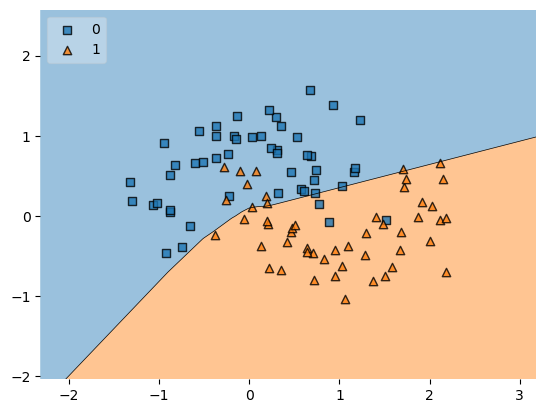

In [28]:
# Decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model1, legend=2)

In [ ]:
(np.random.randn(10,10)*0.01).min()

-0.01538420487066039

In [ ]:
(np.random.randn(10,10)*0.01).max()

0.02825126600648443